# Data 102 Fall 2023 Lecture 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lec3 import show_p_values

%matplotlib inline

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

## Comparing row-wise and column-wise rates

The FDP is the column-wise error rate for when our decision is 1. It asks: how many of the discoveries we made (i.e., our decision was 1) were false (wrong)?

We can relate this to row-wise rates using Bayes' rule. To simplify notation, we'll use $\pi_0 = P(R =0)$.

$$
\begin{align*}
FDP 
&= P(R=0|D=1) \\ 
{\scriptsize{\text{(using Bayes' rule)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1)} \\ 
{\scriptsize{\text{(Law of total probability)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1|R=0)P(R=0) + P(D=1|R=1)P(R=1)} \\
{\scriptsize{\text{(dividing by the numerator)}}} &= \frac{1}{1 + \frac{P(D = 1 | R = 1)}{P(D=1 | R=0)} \frac{P(R = 1)}{P(R=0)}}\\
{\scriptsize{\text{(applying definitions)}}} &= \frac{1}{1 + \frac{TPR}{FPR} \frac{1 - \pi_0}{\pi_0}}
\end{align*}
$$

In [2]:
def compute_fdp(tpr, fpr, prevalence):
    return 1 / (1 + (tpr/fpr) * (prevalence/(1-prevalence)))

Suppose we have an algorithm that predicts whether or not it'll rain. We apply our algorithm in Berkeley (where it almost never rains in the summer) and in Miami, FL (where it rains about half the time in the summer).

In [3]:
# Summer in Miami, good test
compute_fdp(tpr=0.99, fpr=0.01, prevalence=0.5)

0.01

In [4]:
# Summer in Berkeley, good test
compute_fdp(tpr=0.99, fpr=0.01, prevalence=0.01)

0.5

In [5]:
# Summer in Miami, bad test
compute_fdp(tpr=0.6, fpr=0.4, prevalence=0.5)

0.4

In [6]:
# Summer in Berkeley, bad test
compute_fdp(tpr=0.6, fpr=0.4, prevalence=0.01)

0.9850746268656717

## Multiple hypothesis testing and decisions

Suppose we have a collection of $p$-values, with ground truth labels.

In [7]:
p_values_orig = pd.read_csv('pvalues.csv')
p_values = p_values_orig.copy()
p_values.head()

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0


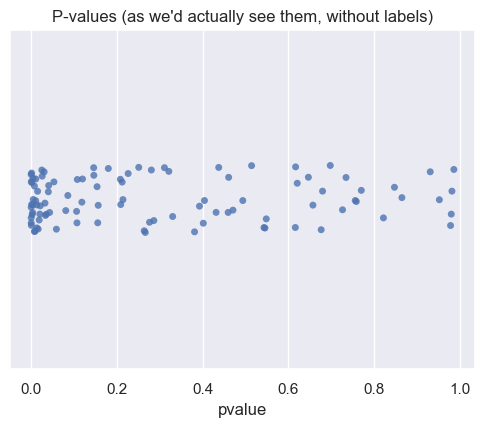

In [8]:
sns.stripplot(
    data=p_values, x='pvalue',
    alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)
plt.title("P-values (as we'd actually see them, without labels)");

Text(0.5, 1.0, 'P-values, with ground truth labels')

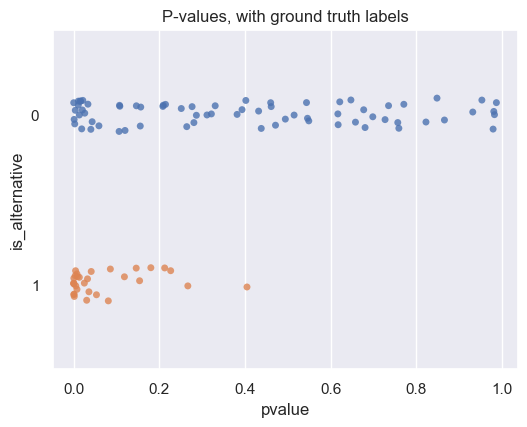

In [9]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h",
)
plt.title('P-values, with ground truth labels')

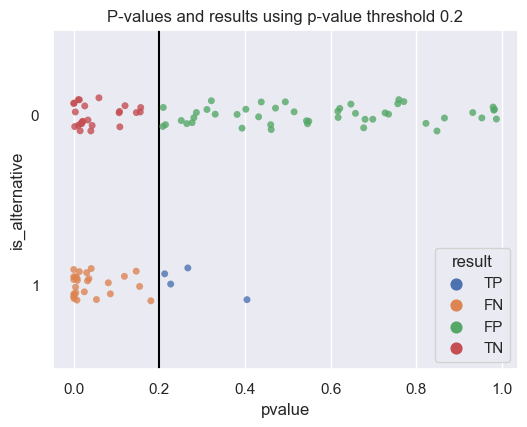

In [10]:
show_p_values(p_values, threshold=0.2, show_labels=True)

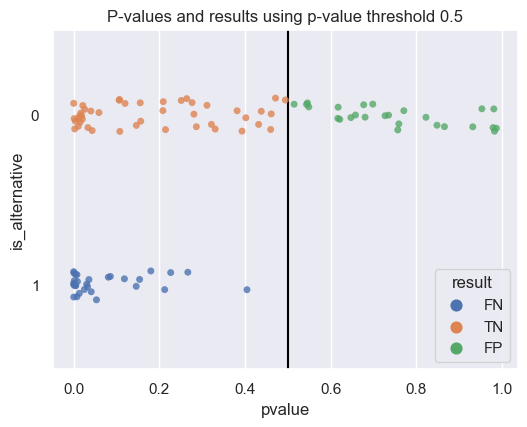

In [11]:
show_p_values(p_values, threshold=0.5, show_labels=True)

## Controlling FWER with Bonferroni

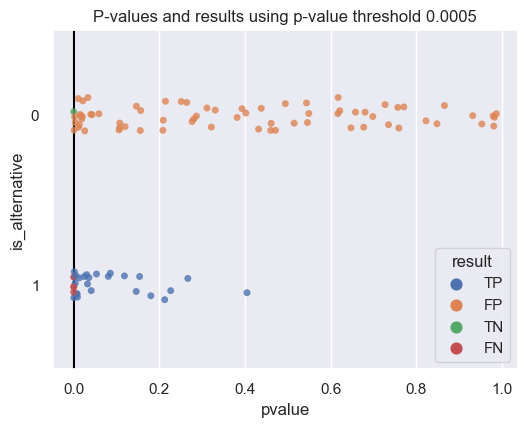

In [12]:
num_tests = p_values.shape[0]
desired_fwer = 0.05
show_p_values(p_values, threshold= desired_fwer / num_tests, show_labels=True)

## Controlling FDR with Benjamini-Hochberg

In [13]:
p_sorted = p_values_orig.sort_values('pvalue')

In [14]:
m = len(p_sorted)  # number of tests
k = np.arange(1, m+1)  # index of each test in sorted order
p_sorted['k'] = k 
p_sorted

,pvalue,is_alternative,k
94,0.000008,1,1
10,0.000109,0,2
86,0.000162,1,3
99,0.000219,1,4
42,0.000436,1,5
...,...,...,...
45,0.952674,0,96
9,0.978843,0,97
22,0.980498,0,98
76,0.982076,0,99


In [15]:
alpha = .05

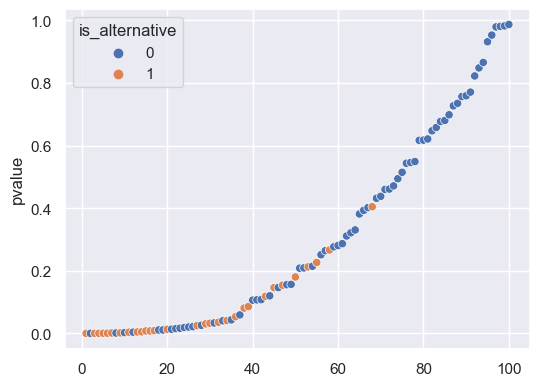

In [16]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);

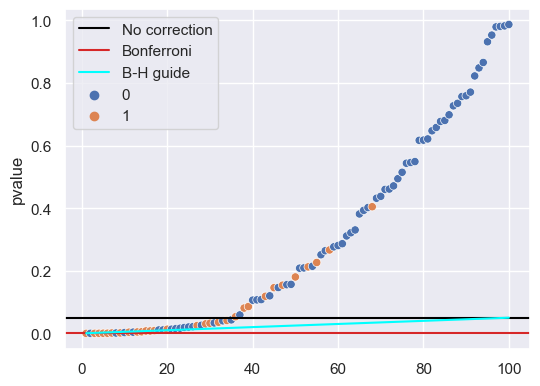

In [17]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')
plt.legend();

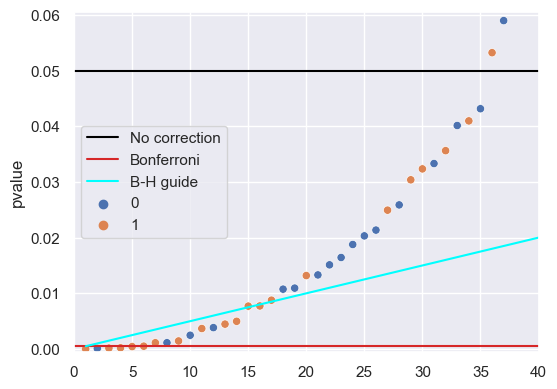

In [18]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')

plt.axis([-0.05, 40, -0.0005, 0.0605])
plt.legend();